In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re as re
import datetime as dt




# Ayiti Analytics Data Processing Bootcamp
  Ayiti Analytics Data wants to expand its training centers throughout all the communes of the country. Your role as a data analyst is to help them realize this dream.

Its objective is to know which three communes of the country will be the most likely to expand its training centers.

Knowing that each cohort must have 30 students
 
* How many applications must be made to select 25% women for each on average

* What are the most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a student to be susceptible to selection
 
* What is the average number of university students who should participate in this program
* What will be the average number of applications per week that we could have
* How many weeks should we extend the application process to select 60 students per commune?
* If we were to do all the bootcamp online, who would be the best communes and how many applications would we need to select 30 student and what percentage of students would have a laptop, an internet connection, both at the same time
* What are the most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a women to be susceptible to selection

### NB 
Use the same framework of the BA project to complete this project


In [69]:
enroll=pd.read_csv(r'enroll.csv')
industry=pd.read_csv(r'industry.csv')
ord1=pd.read_csv(r'ord.csv')
study_domain=pd.read_csv(r'study_domain.csv')
technology=pd.read_csv(r'technology.csv')
transaction=pd.read_csv(r'transaction.csv')
commune=pd.read_excel(r'commune.xlsx')
quest=pd.read_csv(r'quest.csv')

In [70]:

# extract each values of "technology" and place into a separate columns before merge
technology1 = pd.get_dummies(technology[["key", "quest_id", "values"]], columns=['values'], prefix="", prefix_sep="")
technology2 = technology1.groupby("quest_id").sum()

In [71]:
# extract each values of "industry" and place into a separate columns before merge
industry1 = pd.get_dummies(data=industry[["key", "quest_id", "values"]], columns=['values'], prefix="", prefix_sep="")
industry2 = industry1.groupby("quest_id").sum()

In [72]:
# extract each values of "study_domain" and place them into a separate columns before merge
study_domain1 = pd.get_dummies(data=study_domain[["key", "quest_id", "values"]], columns=['values'], prefix="",prefix_sep="")
study_domain2 = study_domain1.groupby("quest_id").sum()

In [73]:
enroll=enroll[['quest_id','started_at','activated_at','completed','percentage_completed','user_id']]

In [74]:
quest=quest[['gender','dob','commune','created_at','department','education_level','university','study_domain','current_employed','formal_sector_job','have_computer_home','hear_AA_1','internet_at_home','quest_id']]


In [75]:
# merge table by quest_id
result=pd.merge(left=quest, right=enroll, how = 'left',on='quest_id')
result1=pd.merge(left=result, right=study_domain2, how = 'left',on='quest_id')
result2=pd.merge(left=result1, right=technology2, how = 'left',on='quest_id')
result3=pd.merge(left=result2, right=industry2, how = 'left',on='quest_id')

# transform "Commune_Id" Value in a lower Character before merge 
commune["Commune_Id"] = commune["Commune_Id"].str.lower()

#commune['id'] = commune["Commune_Id"].apply(lambda x : x[2:])
#commune['commune'] = (commune["Commune_Id"].apply(lambda x : x[0:2].lower())+ commune["Commune_Id"].apply(lambda x : x[2:]))

# rename "Commune_Id" in "commune"
commune.rename(columns = {"Commune_Id": "commune"}, inplace = True)

#commune = commune.iloc[:, :-1]
#commune.drop(columns= ["lowers", "id"], inplace =True)

In [76]:
# merge Result3 in Commune
result4=pd.merge(left=result3, right=commune[["Commune_FR","Departement", "commune"]], how = 'left',on='commune')
result4["created_at"] = result4["created_at"].str[:10]
# val = result4.isna().sum()
#val[val>0]


In [77]:
resulta = pd.merge(left=ord1, right=transaction, how = 'left',on='user_id')

In [78]:
result5 = pd.merge(left=result4, right=resulta, how = 'left',on='quest_id')

In [79]:
result5.head(2)

,gender,dob,commune,created_at,department,education_level,university,study_domain,current_employed,formal_sector_job,...,subscription,coupon_code,coupon_id,affiliate_referral_code,status,Unnamed: 0_y,created_at_y,modified_at,course_id,transaction_id
0,male,25/08/1998,ht0111,2021-02-14,NaN,unknown,unknown,[],unknown,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,female,29/09/1996,ht0111,2021-02-16,ht01,Bachelors (bacc +4),other,['other'],No,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
result5["dob"].replace({"3 aout 1977": "3/08/1977"}, inplace=True)
#result5[result5["dob"]== '3 aout 1997'
#print(result5.iloc[10:20])


In [81]:
result5["dob"] = pd.to_datetime(result5["dob"])

In [82]:
#see all the columns
result5.columns

Index(['gender', 'dob', 'commune', 'created_at', 'department',
       'education_level', 'university', 'study_domain', 'current_employed',
       'formal_sector_job', 'have_computer_home', 'hear_AA_1',
       'internet_at_home', 'quest_id', 'started_at', 'activated_at',
       'completed', 'percentage_completed', 'user_id_x', 'Accounting',
       'Computer Science', 'Economics', 'Electrical Engineering', 'Law',
       'Management', 'Medicine', 'Statistics', 'other_x', 'Bash', 'Excel',
       'Git', 'Java', 'JavaScript', 'PHP', 'PowerBI or Tableau', 'Python', 'R',
       'SQL', 'VBA', 'other_y', 'Communications', 'Consulting', 'Education',
       'Energy', 'Finance', 'Healthcare', 'Insurance', 'Manufacturing',
       'Marketing', 'Public Sector/ Non-Profit Agencies', 'Retail/ E-Commerce',
       'Technology (Software/ Internet)', 'Transportation', 'other',
       'Commune_FR', 'Departement', 'Unnamed: 0_x', 'created_at_x',
       'user_id_y', 'product_name', 'product_id', 'amount_dollar

In [83]:
result5["created_at"] = pd.to_datetime(result5["created_at"])

In [84]:
result5["male"] = result5["gender"].apply(lambda x: 1 if x == "male" else 0)

In [85]:
result5["female"] = result5["gender"].apply(lambda x: 1 if x=="female" else 0)

In [86]:

registration_date=result5[["created_at","quest_id", "male","female"]].groupby(pd.Grouper(key="created_at",freq='7D')).sum()
registration_date.head()

,male,female
created_at,,
2021-02-14,108,28
2021-02-21,41,13
2021-02-28,26,3
2021-03-07,26,3
2021-03-14,2,0


In [87]:
Percent_registration_date=registration_date/result5.shape[0]
Percent_registration_date

,male,female
created_at,,
2021-02-14,0.432,0.112
2021-02-21,0.164,0.052
2021-02-28,0.104,0.012
2021-03-07,0.104,0.012
2021-03-14,0.008,0.000


if we were to do all the bootcamp online,who would be the best communes and how many how many applications would we need to select 30 students and what percentage of students would have a laptop, an internet connection, both at the same time

In [88]:
int_home=table3["Yes"].to_frame()
int_home_percent= int_home/result5.shape[0]
int_home1=int_home.sort_values(by="Yes", ascending=False)
int_home_percent1=int_home_percent.sort_values(by="Yes",ascending=False)
int_home1.rename(columns={"Yes": "internet_total"},inplace=True)
int_home_percent1.rename(columns={"Yes": "internet_percent"},inplace=True)
int_result= pd.concat([int_home1,int_home_percent1], axis=1)
int_result.head(3)

,internet_total,internet_percent
Commune_FR,,
Delmas,61.0,0.244
Port-au-Prince,52.0,0.208
Pétion-Ville,25.0,0.100


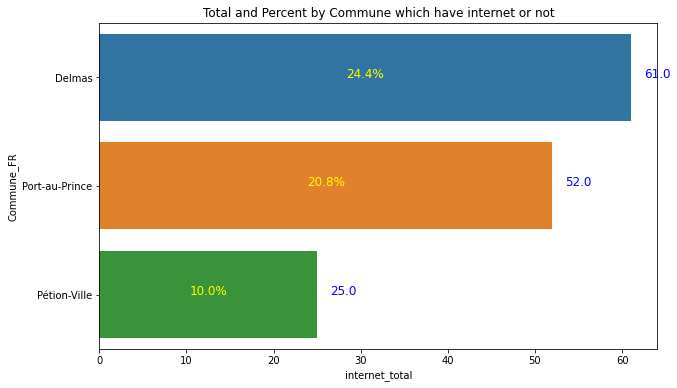

In [89]:
generate_barchart(data=int_result.iloc[:3,:],title="Total and Percent by Commune which have internet or not",abs_value="internet_total",rel_value="internet_percent")

In [90]:
table3 =  pd.pivot_table(data=result5,index="Commune_FR",columns="internet_at_home",values ="quest_id",aggfunc="count")

In [91]:
computer=table4["Yes"].to_frame()
computer_percent = computer/result5.shape[0]
computer1=computer.sort_values(by="Yes", ascending=False)
computer_percent1=computer_percent.sort_values(by="Yes", ascending=False)
computer1.rename(columns={"Yes": "computer total"},inplace=True)
computer_percent1.rename(columns={"Yes": "computer_percent"},inplace=True)
computer_result= pd.concat([computer1,computer_percent1], axis=1)
computer_result.head(3)

,computer total,computer_percent
Commune_FR,,
Delmas,66.0,0.264
Port-au-Prince,57.0,0.228
Pétion-Ville,25.0,0.100


In [92]:
table4 =  pd.pivot_table(data=result5,index="Commune_FR",columns="have_computer_home",values ="quest_id",aggfunc="count")

In [131]:
comp_int= pd.merge(left=int_result,right=computer_result, how="left", on="Commune_FR")
compte_final=comp_int.head(4)
compte_final

,internet_total,internet_percent,computer total,computer_percent
Commune_FR,,,,
Delmas,61.0,0.244,66.0,0.264
Port-au-Prince,52.0,0.208,57.0,0.228
Pétion-Ville,25.0,0.100,25.0,0.100
Carrefour,18.0,0.072,21.0,0.084


In [94]:
    result5["age"]= result5["created_at"]-result5["dob"]
    result5["age"]= result5["age"]//365
    result5["age"]= result5["age"].apply(lambda x: str(x)[:2])
    result5.head()

,gender,dob,commune,created_at,department,education_level,university,study_domain,current_employed,formal_sector_job,...,affiliate_referral_code,status,Unnamed: 0_y,created_at_y,modified_at,course_id,transaction_id,male,female,age
0,male,1998-08-25,ht0111,2021-02-14,NaN,unknown,unknown,[],unknown,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,22
1,female,1996-09-29,ht0111,2021-02-16,ht01,Bachelors (bacc +4),other,['other'],No,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,24
2,male,1996-05-17,ht0111,2021-02-16,ht01,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),[],No,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,24
3,male,1996-11-24,ht0111,2021-02-16,ht01,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),"['item1', 'item6']",No,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,24
4,male,1997-07-20,ht0111,2021-02-16,ht01,High School (16 years),unknown,['other'],No,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,23


In [95]:
result5=result5.rename(columns={"created_at_x":"created_at_x","amount_dollars":"payed-by_card","transaction_id":"payed_by_moncash"})

In [96]:
result5.head(2)

,gender,dob,commune,created_at,department,education_level,university,study_domain,current_employed,formal_sector_job,...,affiliate_referral_code,status,Unnamed: 0_y,created_at_y,modified_at,course_id,payed_by_moncash,male,female,age
0,male,1998-08-25,ht0111,2021-02-14,NaN,unknown,unknown,[],unknown,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,22
1,female,1996-09-29,ht0111,2021-02-16,ht01,Bachelors (bacc +4),other,['other'],No,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,24


In [97]:
# get info about the variables
result5.info


<bound method DataFrame.info of      gender        dob commune created_at department         education_level  \
0      male 1998-08-25  ht0111 2021-02-14        NaN                 unknown   
1    female 1996-09-29  ht0111 2021-02-16       ht01     Bachelors (bacc +4)   
2      male 1996-05-17  ht0111 2021-02-16       ht01     Bachelors (bacc +4)   
3      male 1996-11-24  ht0111 2021-02-16       ht01     Bachelors (bacc +4)   
4      male 1997-07-20  ht0111 2021-02-16       ht01  High School (16 years)   
..      ...        ...     ...        ...        ...                     ...   
245    male 1994-02-15  ht0621 2021-03-02       ht06     Bachelors (bacc +4)   
246    male 1990-08-10  ht0621 2021-03-10       ht06     Bachelors (bacc +4)   
247    male 1993-12-28  ht0621 2021-03-14       ht06     Bachelors (bacc +4)   
248    male 1992-04-17  ht0412 2021-03-08       ht04     Bachelors (bacc +4)   
249    male 1993-07-22  ht1012 2021-03-10       ht10                 Masters   

       

In [98]:
result5

,gender,dob,commune,created_at,department,education_level,university,study_domain,current_employed,formal_sector_job,...,affiliate_referral_code,status,Unnamed: 0_y,created_at_y,modified_at,course_id,payed_by_moncash,male,female,age
0,male,1998-08-25,ht0111,2021-02-14,NaN,unknown,unknown,[],unknown,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,22
1,female,1996-09-29,ht0111,2021-02-16,ht01,Bachelors (bacc +4),other,['other'],No,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,24
2,male,1996-05-17,ht0111,2021-02-16,ht01,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),[],No,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,24
3,male,1996-11-24,ht0111,2021-02-16,ht01,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),"['item1', 'item6']",No,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,24
4,male,1997-07-20,ht0111,2021-02-16,ht01,High School (16 years),unknown,['other'],No,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,male,1994-02-15,ht0621,2021-03-02,ht06,Bachelors (bacc +4),other,['other'],Yes,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,27
246,male,1990-08-10,ht0621,2021-03-10,ht06,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),['item8'],Yes,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,30
247,male,1993-12-28,ht0621,2021-03-14,ht06,Bachelors (bacc +4),Centre de Techniques de Planification et d'Eco...,['item2'],Yes,Yes,...,NaN,Complete,NaN,NaN,NaN,NaN,NaN,1,0,27
248,male,1992-04-17,ht0412,2021-03-08,ht04,Bachelors (bacc +4),other,['item1'],No,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,28


In [99]:
###how to see null values
values = result5.isna().sum() 
values[values>0]

dob                                     6
department                              1
started_at                            150
activated_at                          185
completed                             148
percentage_completed                  148
user_id_x                             148
Accounting                              6
Computer Science                        6
Economics                               6
Electrical Engineering                  6
Law                                     6
Management                              6
Medicine                                6
Statistics                              6
other_x                                 6
Bash                                    6
Excel                                   6
Git                                     6
Java                                    6
JavaScript                              6
PHP                                     6
PowerBI or Tableau                      6
Python                            

In [100]:
# display value columns in the titanic dataframe
result5[result5.dob.isna()]

,gender,dob,commune,created_at,department,education_level,university,study_domain,current_employed,formal_sector_job,...,affiliate_referral_code,status,Unnamed: 0_y,created_at_y,modified_at,course_id,payed_by_moncash,male,female,age
35,male,NaT,ht0111,2021-02-23,ht01,Other,unknown,['item8'],No,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,Na
58,male,NaT,ht0111,2021-03-14,ht01,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),"['item1', 'item6']",No,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,Na
116,female,NaT,ht0112,2021-03-03,ht01,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),['other'],No,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,Na
154,female,NaT,ht0113,2021-02-18,ht01,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),['other'],No,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,Na
194,male,NaT,ht0131,2021-02-16,ht01,Bachelors (bacc +4),Université INUKA,['item1'],No,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,Na
221,male,NaT,ht0443,2021-02-19,ht04,High School (16 years),unknown,['item3'],unknown,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,Na


In [101]:
result5.dob = result5["dob"].fillna(value =result5.dob.mean())

In [102]:
result5[result5.dob.isna()]

,gender,dob,commune,created_at,department,education_level,university,study_domain,current_employed,formal_sector_job,...,affiliate_referral_code,status,Unnamed: 0_y,created_at_y,modified_at,course_id,payed_by_moncash,male,female,age


In [103]:
result5.columns

Index(['gender', 'dob', 'commune', 'created_at', 'department',
       'education_level', 'university', 'study_domain', 'current_employed',
       'formal_sector_job', 'have_computer_home', 'hear_AA_1',
       'internet_at_home', 'quest_id', 'started_at', 'activated_at',
       'completed', 'percentage_completed', 'user_id_x', 'Accounting',
       'Computer Science', 'Economics', 'Electrical Engineering', 'Law',
       'Management', 'Medicine', 'Statistics', 'other_x', 'Bash', 'Excel',
       'Git', 'Java', 'JavaScript', 'PHP', 'PowerBI or Tableau', 'Python', 'R',
       'SQL', 'VBA', 'other_y', 'Communications', 'Consulting', 'Education',
       'Energy', 'Finance', 'Healthcare', 'Insurance', 'Manufacturing',
       'Marketing', 'Public Sector/ Non-Profit Agencies', 'Retail/ E-Commerce',
       'Technology (Software/ Internet)', 'Transportation', 'other',
       'Commune_FR', 'Departement', 'Unnamed: 0_x', 'created_at_x',
       'user_id_y', 'product_name', 'product_id', 'payed-by_card

In [104]:
result5=result5[['gender','dob','commune','Commune_FR','created_at_x','department','education_level','university','study_domain','have_computer_home','hear_AA_1','internet_at_home','quest_id','status','created_at_x','modified_at','age']]

In [105]:
result5.head(2)

,gender,dob,commune,Commune_FR,created_at_x,department,education_level,university,study_domain,have_computer_home,hear_AA_1,internet_at_home,quest_id,status,created_at_x,modified_at,age
0,male,1998-08-25,ht0111,Port-au-Prince,NaN,NaN,unknown,unknown,[],unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601,NaN,NaN,NaN,22
1,female,1996-09-29,ht0111,Port-au-Prince,NaN,ht01,Bachelors (bacc +4),other,['other'],Yes,Friend,Yes,905ddcf2-ce95-11eb-9a92-7c67a234f601,NaN,NaN,NaN,24


In [106]:
result5.describe()

<ipython-input-106-a6c7ec9b1c17>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  result5.describe()


,gender,dob,commune,Commune_FR,created_at_x,department,education_level,university,study_domain,have_computer_home,hear_AA_1,internet_at_home,quest_id,status,created_at_x,modified_at,age
count,250,250,250,250,14,249,250,250,250,250,250,250,250,14,14,0,250
unique,2,237,35,35,14,9,6,7,31,3,10,3,250,1,14,0,32
top,male,1994-03-13 18:05:54.098360704,ht0112,Delmas,2021-02-18T14:45:02.292Z,ht01,Bachelors (bacc +4),unknown,['item1'],Yes,Friend,Yes,906036c8-ce95-11eb-8c78-7c67a234f601,Complete,2021-02-18T14:45:02.292Z,NaN,24
freq,203,6,71,71,1,212,148,95,80,234,67,210,1,14,1,NaN,28
first,NaN,1970-07-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2021-08-14 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
f=result5['Commune_FR'].to_frame()

In [108]:
f

,Commune_FR
0,Port-au-Prince
1,Port-au-Prince
2,Port-au-Prince
3,Port-au-Prince
4,Port-au-Prince
...,...
245,Mirebalais
246,Mirebalais
247,Mirebalais
248,Ferrier


Data Processing

Ayiti Analytics Data wants to expand its training centers throughout all the communes of the country. Your role as a data analyst is to help them realize this dream.

Its objective is to know which three communes of the country will be the most likely to expand its training centers.

Knowing that each cohort must have 30 students

How many applications must be made to select 25% women for each on average

What are the most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a student to be susceptible to selection

What is the average number of university students who should participate in this program

What will be the average number of applications per week that we could have
How many weeks should we extend the application process to select 60 students per commune?
If we were to do all the bootcamp online, who would be the best communes and how many applications would we need to select 30 student and what percentage of students would have a laptop, an internet connection, both at the same time
What are the most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a women to be susceptible to selection


In [109]:
# Define a function who generate barchart

def generate_barchart(data=result, title ="",abs_value ="Total",rel_value="Percent",figsize =(10,6)):
  plt.figure(figsize=figsize)
  axes = sns.barplot(data=data,y=data.index,x=abs_value)
  i=0
  for tot, perc in zip(data[abs_value],data[rel_value]):
    axes.text(tot/2,
              i,
              str(np.round(perc*100,2))+ "%",
               fontdict=dict(color='yellow',fontsize=12,horizontalalignment="center")
              )
    axes.text(tot+3,
              i,
              str(tot),
               fontdict=dict(color='blue',fontsize=12,horizontalalignment="center")
              )
    
    i+=1
  plt.title(title)
  plt.show()


In [110]:
# Calculate absolute frequency and relative Frequency for a categpric variable


def prob_category(data,top_n =6,col="Pclass_letter", abs_value ="Total",rel_value ="Percent",show_plot=False, title="",figsize=(10,20)):
  # absolute value
   res1 = data[col].value_counts().to_frame()
   res1.columns = [abs_value]

   res2 = data[col].value_counts(normalize=True).to_frame()
   res2.columns = [rel_value]
   if  not show_plot:
     return pd.concat([res1,res2],axis=1).head(top_n)
   else:
     result = pd.concat([res1,res2],axis=1).head(top_n)
     generate_barchart(data=result, title =title,abs_value =abs_value,rel_value=rel_value,figsize =figsize)
     return result


In [111]:
def pivot(y):
    pivo=pd.pivot_table(result5, values='quest_id', index=['Commune_FR'], columns=y,aggfunc='count')
    pivo=pivo.fillna(0)
    return pivo
    my_pivot=pivot('internet_at_home')

In [112]:
table =  pd.pivot_table(data=result5,index="Commune_FR",columns="internet_at_home",values ="quest_id",aggfunc="count")

In [113]:
table

internet_at_home,No,Yes,unknown
Commune_FR,,,
Aquin,NaN,1.0,NaN
Cap-Haïtien,2.0,3.0,NaN
Caracol,NaN,1.0,NaN
Carrefour,5.0,18.0,NaN
Cité Soleil,NaN,3.0,NaN
Cornillon / Grand Bois,NaN,1.0,NaN
Croix-Des-Bouquets,2.0,8.0,NaN
Delmas,10.0,61.0,NaN
Dondon,1.0,NaN,NaN


In [114]:
table1 =  pd.pivot_table(data=result5,index="Commune_FR",columns="gender",values ="quest_id",aggfunc="count")

In [115]:
table1

gender,female,male
Commune_FR,,
Aquin,NaN,1.0
Cap-Haïtien,NaN,5.0
Caracol,NaN,1.0
Carrefour,6.0,17.0
Cité Soleil,1.0,2.0
Cornillon / Grand Bois,NaN,1.0
Croix-Des-Bouquets,NaN,10.0
Delmas,12.0,59.0
Dondon,NaN,1.0


What are the most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a women to be susceptible to selection

In [116]:
table2 =  pd.pivot_table(data=result5,index="gender",columns="hear_AA_1",values ="quest_id",aggfunc="count")


<AxesSubplot:xlabel='gender', ylabel='hear_AA_1'>

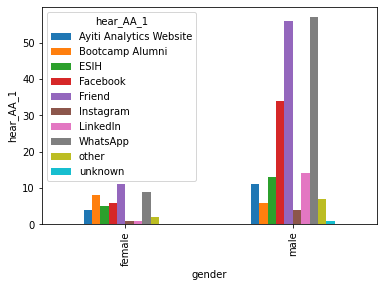

In [117]:
table2 = table2.plot(kind="bar")
# Get a Matplotlib figure from the axes object for formatting purposes
# table =table2.get_figure()
# Change the plot dimensions (width,height)
#table2.set_size_inches(20, 10)
#Change the axes labels
table2.set_xlabel("gender")
table2.set_ylabel("hear_AA_1")
table2

In [118]:
table2

<AxesSubplot:xlabel='gender', ylabel='hear_AA_1'>

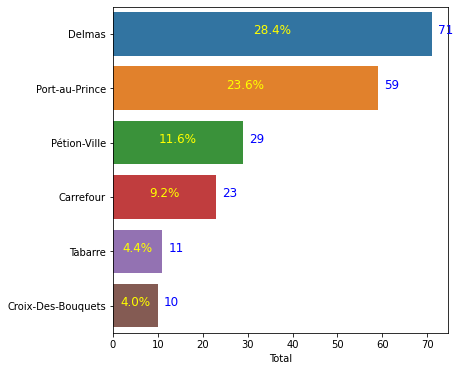

,Total,Percent
Delmas,71,0.284
Port-au-Prince,59,0.236
Pétion-Ville,29,0.116
Carrefour,23,0.092
Tabarre,11,0.044
Croix-Des-Bouquets,10,0.040


In [119]:
prob_category(data=result5,col="Commune_FR", show_plot=True,figsize= (6,6))


In [120]:
table3 =  pd.pivot_table(data=result5,index="Commune_FR",columns="internet_at_home",values ="quest_id",aggfunc="count")

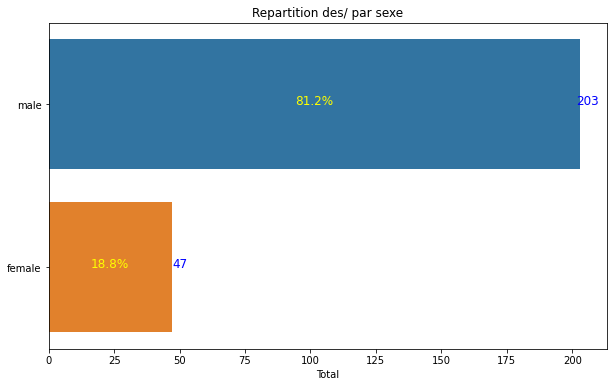

,Total,Percent
male,203,0.812
female,47,0.188


In [121]:
prob_category(data=result5,col="gender",show_plot=True,figsize= (10,6), title="Repartition des/ par sexe")

What are the most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a student to be susceptible to selection

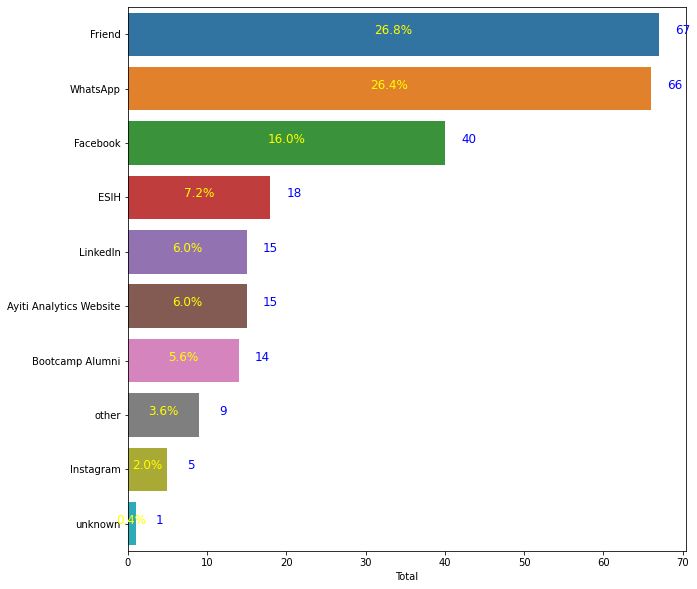

,Total,Percent
Friend,67,0.268
WhatsApp,66,0.264
Facebook,40,0.160
ESIH,18,0.072
LinkedIn,15,0.060
Ayiti Analytics Website,15,0.060
Bootcamp Alumni,14,0.056
other,9,0.036
Instagram,5,0.020
unknown,1,0.004


In [122]:
prob_category(data=result5,top_n=10,col='hear_AA_1',show_plot=True,figsize= (10,10))


Based on this graph, the 3 most effective channels that will allow a student to be susceptible to selection are the three first like : Friend, Whatsapp, Facebook.

what is the average number of university students who should participate in this progarm

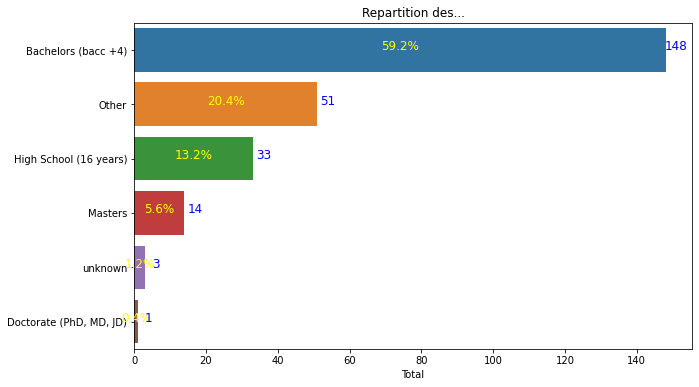

,Total,Percent
Bachelors (bacc +4),148,0.592
Other,51,0.204
High School (16 years),33,0.132
Masters,14,0.056
unknown,3,0.012
"Doctorate (PhD, MD, JD)",1,0.004


In [123]:
prob_category(data=result5,col="education_level",show_plot=True,figsize= (10,6), title="Repartition des...")

In [124]:
((result5[['education_level']]=="Bachelors (bacc +4)").sum() + (result5[['education_level']]=="Masters").sum() +(result5[["education_level"]]=="Doctorate (PhD, MD, JD)").sum())/result5.shape[0]


education_level    0.652
dtype: float64

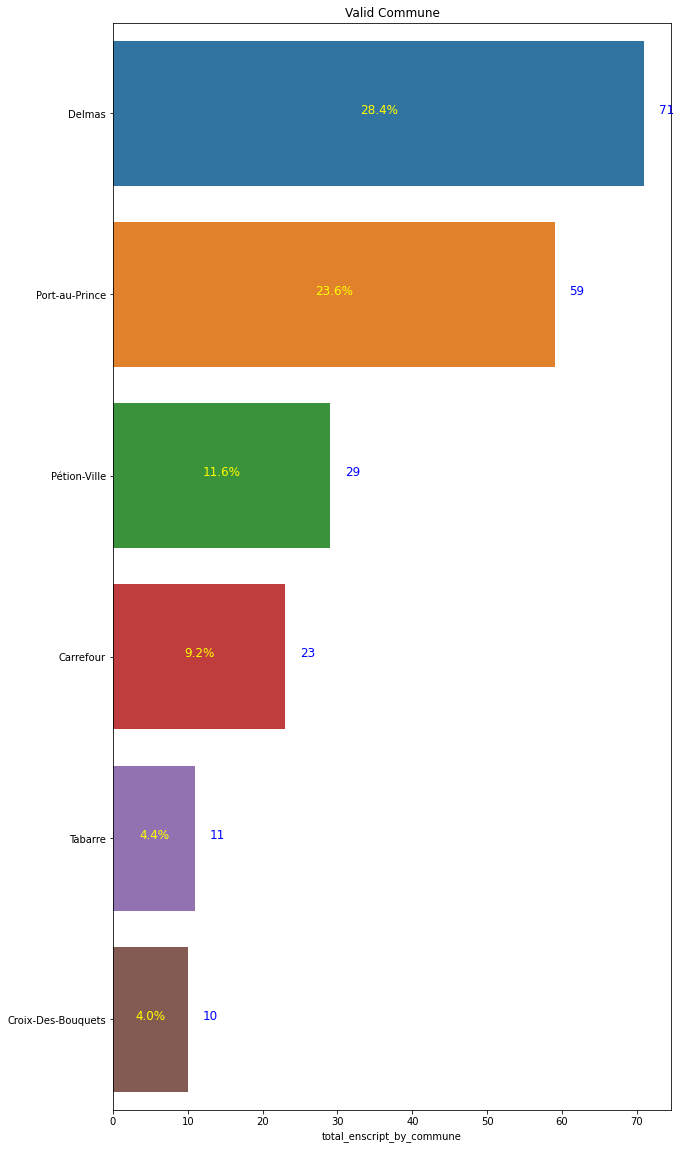

Based on this table, Ayiti Analytics must choose to open theirs training centers in the tree most important commune :Delmas, Port-au-Prince, Petion-ville


In [125]:
result5 = prob_category(data=result5,col="Commune_FR",abs_value="total_enscript_by_commune",rel_value="Percent_pay_by_Commune",show_plot=True, title="Valid Commune")
print("Based on this table, Ayiti Analytics must choose to open theirs training centers in the tree most important commune :" 
       "Delmas, Port-au-Prince, Petion-ville")